<a href="https://colab.research.google.com/github/hamidhosen42/Machine-Learning-Projects/blob/main/1_Project_1_SONAR_Rock_vs_Mine_Prediction_with_Python_or_End_To_End_Python_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Work in model

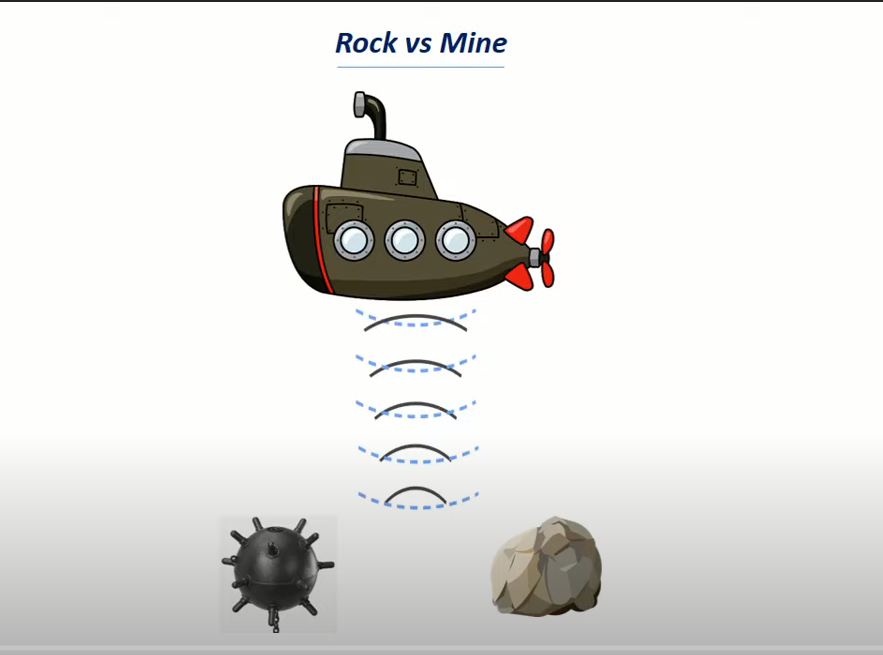

In [4]:
from PIL import Image
img=Image.open("/content/2-Sonar.png")
img

In [3]:
from PIL import Image
img=Image.open("/content/1-Sonar.png")
img

#### Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Data Collection and Data Processing

In [6]:
#loading the dataset to a pandas Dataframe
sonar_data=pd.read_csv("/content/sonar data.csv",header=None)

In [7]:
sonar_data

0       1       2       3       4   ...      56      57      58      59  60
0    0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032   R
1    0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044   R
2    0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078   R
3    0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117   R
4    0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094   R
..      ...     ...     ...     ...     ...  ...     ...     ...     ...     ...  ..
203  0.0187  0.0346  0.0168  0.0177  0.0393  ...  0.0065  0.0115  0.0193  0.0157   M
204  0.0323  0.0101  0.0298  0.0564  0.0760  ...  0.0034  0.0032  0.0062  0.0067   M
205  0.0522  0.0437  0.0180  0.0292  0.0351  ...  0.0140  0.0138  0.0077  0.0031   M
206  0.0303  0.0353  0.0490  0.0608  0.0167  ...  0.0034  0.0079  0.0036  0.0048   M
207  0.0260  0.0363  0.0136  0.0272  0.0214  ...  0.0040  0.0036  0.0061  0.0115   M

[208 rows x 61 columns]

In [8]:
sonar_data.plot()

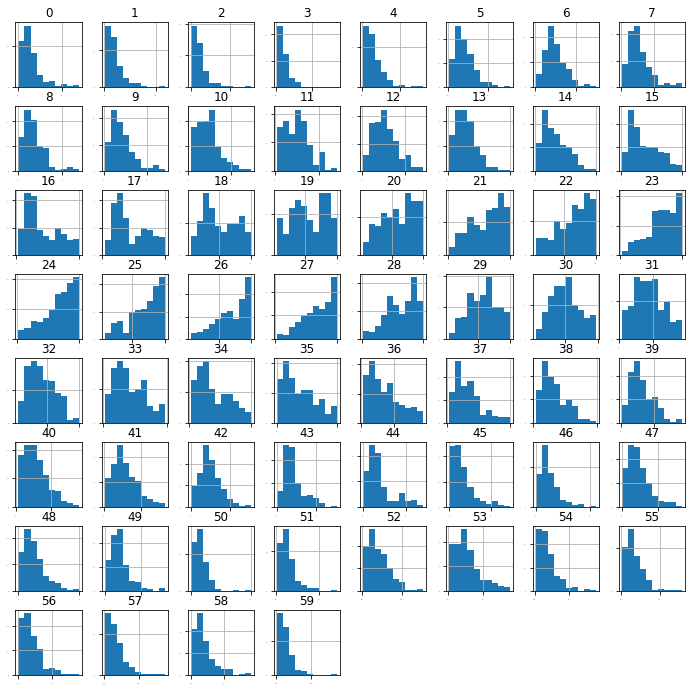

In [9]:
# histograms
sonar_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

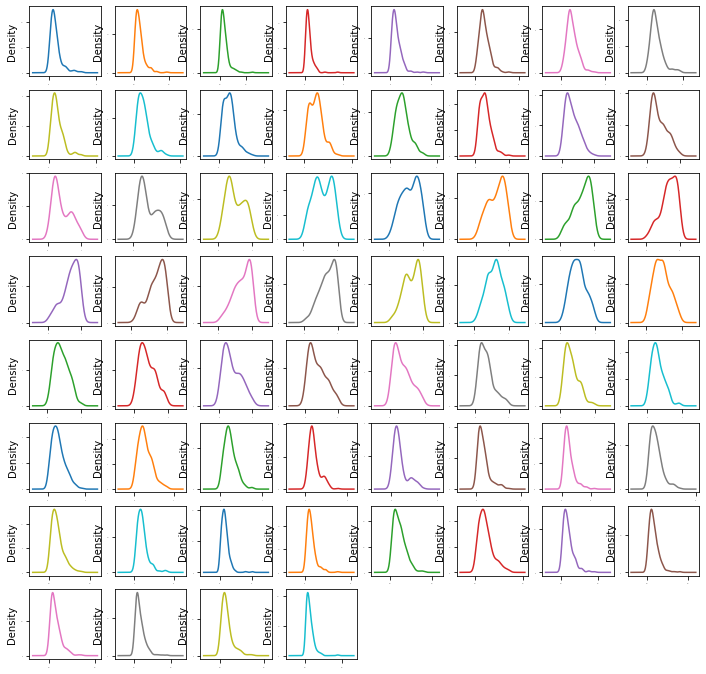

In [10]:
# density
sonar_data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show()

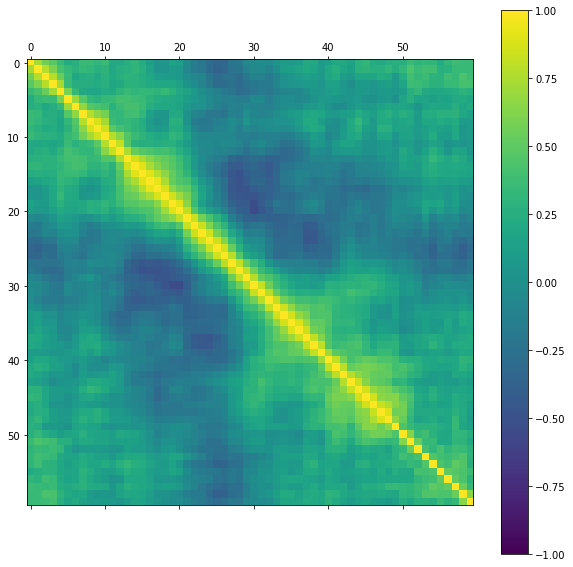

In [11]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sonar_data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
plt.show()

In [12]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [13]:
#describe --> statistical measures of the data
sonar_data.describe()

0           1           2   ...          57          58          59
count  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832  ...    0.007949    0.007941    0.006507
std      0.022991    0.032960    0.038428  ...    0.006470    0.006181    0.005031
min      0.001500    0.000600    0.001500  ...    0.000300    0.000100    0.000600
25%      0.013350    0.016450    0.018950  ...    0.003600    0.003675    0.003100
50%      0.022800    0.030800    0.034300  ...    0.005800    0.006400    0.005300
75%      0.035550    0.047950    0.057950  ...    0.010350    0.010325    0.008525
max      0.137100    0.233900    0.305900  ...    0.044000    0.036400    0.043900

[8 rows x 60 columns]

In [14]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

### M --> Mine

### R --> Rock

In [15]:
sonar_data.groupby(60).mean()

0         1         2   ...        57        58        59
60                                ...                              
M   0.034989  0.045544  0.050720  ...  0.009060  0.008695  0.006930
R   0.022498  0.030303  0.035951  ...  0.006677  0.007078  0.006024

[2 rows x 60 columns]

In [16]:
sonar_data.groupby(60).median()

0       1       2       3   ...      56      57      58      59
60                                  ...                                
M   0.0269  0.0353  0.0386  0.0547  ...  0.0057  0.0070  0.0070  0.0053
R   0.0201  0.0242  0.0288  0.0350  ...  0.0061  0.0052  0.0058  0.0054

[2 rows x 60 columns]

In [17]:
# separating data and Labels
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

In [18]:
X

0       1       2       3   ...      56      57      58      59
0    0.0200  0.0371  0.0428  0.0207  ...  0.0180  0.0084  0.0090  0.0032
1    0.0453  0.0523  0.0843  0.0689  ...  0.0140  0.0049  0.0052  0.0044
2    0.0262  0.0582  0.1099  0.1083  ...  0.0316  0.0164  0.0095  0.0078
3    0.0100  0.0171  0.0623  0.0205  ...  0.0050  0.0044  0.0040  0.0117
4    0.0762  0.0666  0.0481  0.0394  ...  0.0072  0.0048  0.0107  0.0094
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
203  0.0187  0.0346  0.0168  0.0177  ...  0.0065  0.0115  0.0193  0.0157
204  0.0323  0.0101  0.0298  0.0564  ...  0.0034  0.0032  0.0062  0.0067
205  0.0522  0.0437  0.0180  0.0292  ...  0.0140  0.0138  0.0077  0.0031
206  0.0303  0.0353  0.0490  0.0608  ...  0.0034  0.0079  0.0036  0.0048
207  0.0260  0.0363  0.0136  0.0272  ...  0.0040  0.0036  0.0061  0.0115

[208 rows x 60 columns]

In [19]:
Y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

#### Training and Test data

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [21]:
print("X Shape={}".format(X.shape))
print("X_train Shape={}".format(x_train.shape))
print("X_test Shape={}".format(x_test.shape))

X Shape=(208, 60)
X_train Shape=(187, 60)
X_test Shape=(21, 60)


In [22]:
print(x_train)
print("X_train Shape={}".format(x_train.shape))

print(y_train)
print("y_train Shape={}".format(y_train.shape))

         0       1       2       3   ...      56      57      58      59
115  0.0414  0.0436  0.0447  0.0844  ...  0.0141  0.0077  0.0246  0.0198
38   0.0123  0.0022  0.0196  0.0206  ...  0.0113  0.0058  0.0047  0.0071
56   0.0152  0.0102  0.0113  0.0263  ...  0.0037  0.0011  0.0034  0.0033
123  0.0270  0.0163  0.0341  0.0247  ...  0.0138  0.0094  0.0105  0.0093
18   0.0270  0.0092  0.0145  0.0278  ...  0.0120  0.0132  0.0070  0.0088
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
140  0.0412  0.1135  0.0518  0.0232  ...  0.0095  0.0225  0.0098  0.0085
5    0.0286  0.0453  0.0277  0.0174  ...  0.0057  0.0027  0.0051  0.0062
154  0.0117  0.0069  0.0279  0.0583  ...  0.0020  0.0062  0.0026  0.0052
131  0.1150  0.1163  0.0866  0.0358  ...  0.0190  0.0141  0.0068  0.0086
203  0.0187  0.0346  0.0168  0.0177  ...  0.0065  0.0115  0.0193  0.0157

[187 rows x 60 columns]
X_train Shape=(187, 60)
115    M
38     R
56     R
123    M
18     R
      ..
140    M
5      R
154

#### Model Training --> Logistic Regression Algorithm

In [23]:
model=LogisticRegression()

In [24]:
#training the Logistic Regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

#### Model Evaluation

In [25]:
#accuracy on training data
x_train_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [26]:
model.predict(x_train)

array(['M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R',
       'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M',
       'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M',
       'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R',
       'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R',
       'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R',
       'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M

In [27]:
print('Accuracy on training data : ', model.score(x_train,y_train))

Accuracy on training data :  0.8342245989304813


In [28]:
#accuracy on test data
x_test_predict=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_predict,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7619047619047619


In [29]:
model.predict(x_test)

array(['M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R'], dtype=object)

In [30]:
print('Accuracy on training data : ', model.score(x_test,y_test))

Accuracy on training data :  0.7619047619047619


#### Making a Predictive System

In [31]:
input_data = (0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,0.0801,0.1056,0.1266,0.0890,0.0198,0.1133,0.2826,0.3234,0.3238,0.4333,0.6068,0.7652,0.9203,0.9719,0.9207,0.7545,0.8289,0.8907,0.7309,0.6896,0.5829,0.4935,0.3101,0.0306,0.0244,0.1108,0.1594,0.1371,0.0696,0.0452,0.0620,0.1421,0.1597,0.1384,0.0372,0.0688,0.0867,0.0513,0.0092,0.0198,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040)

# changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
input_data_as_numpy_array

array([0.0164, 0.0173, 0.0347, 0.007 , 0.0187, 0.0671, 0.1056, 0.0697,
       0.0962, 0.0251, 0.0801, 0.1056, 0.1266, 0.089 , 0.0198, 0.1133,
       0.2826, 0.3234, 0.3238, 0.4333, 0.6068, 0.7652, 0.9203, 0.9719,
       0.9207, 0.7545, 0.8289, 0.8907, 0.7309, 0.6896, 0.5829, 0.4935,
       0.3101, 0.0306, 0.0244, 0.1108, 0.1594, 0.1371, 0.0696, 0.0452,
       0.062 , 0.1421, 0.1597, 0.1384, 0.0372, 0.0688, 0.0867, 0.0513,
       0.0092, 0.0198, 0.0118, 0.009 , 0.0223, 0.0179, 0.0084, 0.0068,
       0.0032, 0.0035, 0.0056, 0.004 ])

In [32]:
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped

array([[0.0164, 0.0173, 0.0347, 0.007 , 0.0187, 0.0671, 0.1056, 0.0697,
        0.0962, 0.0251, 0.0801, 0.1056, 0.1266, 0.089 , 0.0198, 0.1133,
        0.2826, 0.3234, 0.3238, 0.4333, 0.6068, 0.7652, 0.9203, 0.9719,
        0.9207, 0.7545, 0.8289, 0.8907, 0.7309, 0.6896, 0.5829, 0.4935,
        0.3101, 0.0306, 0.0244, 0.1108, 0.1594, 0.1371, 0.0696, 0.0452,
        0.062 , 0.1421, 0.1597, 0.1384, 0.0372, 0.0688, 0.0867, 0.0513,
        0.0092, 0.0198, 0.0118, 0.009 , 0.0223, 0.0179, 0.0084, 0.0068,
        0.0032, 0.0035, 0.0056, 0.004 ]])

In [33]:
prediction=model.predict(input_data_reshaped)
prediction

array(['R'], dtype=object)

In [34]:
if(prediction == 'R'):
    print("The object is a Rock")
else:
    print("The object is a mine")

The object is a Rock
